# OpenScope's Illusion Dataset

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [57]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [58]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ccfwidget import CCFWidget
from math import floor, ceil, isclose
from PIL import Image

### The Experiment

In [59]:
session_files = pd.read_csv("../../data/illusion_sessions.csv")
session_files

,identifier,size,path,session time,sub name,sub sex,sub age,sub genotype,probes,stim types,# units,session length
0,dbc426a0-aafa-460b-a25a-a86bb31b9ddc,2242666496,sub_1175512783/sub_1175512783sess_1187930705/s...,2022-06-29 00:00:00-07:00,619296,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",1918,7278.157990
1,181b7651-5f5c-491b-be70-e5d0354439d4,2803525629,sub_1172968426/sub_1172968426sess_1182865981/s...,2022-06-08 00:00:00-07:00,625545,M,89.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2793,7279.234305
2,85bfd56c-f104-4c83-937c-be0d58fce48e,2372313526,sub_1172969394/sub_1172969394sess_1183070926/s...,2022-06-09 00:00:00-07:00,625555,F,90.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2621,7278.592876
3,c5e97840-4988-4da8-9f57-a24fb0a4a865,2466318464,sub_1181585608/sub_1181585608sess_1194644312/s...,2022-07-27 00:00:00-07:00,630507,F,99.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2464,7278.964870
4,a7ff352c-0b00-47d6-a49f-97027d18264e,2809532134,sub_1176214862/sub_1176214862sess_1188137866/s...,2022-06-30 00:00:00-07:00,620333,M,148.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2593,7283.108060
5,a8bc8aaf-ccba-4c27-bb5c-f1bc3c232c84,3393216313,sub_1174569641/sub_1174569641sess_1184671550/s...,2022-06-01 00:00:00-07:00,625554,M,82.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2930,7315.456085
6,32af00b4-4aa6-48de-8210-26a5cf7935a9,3556822422,sub_1181314060/sub_1181314060sess_1191383105/s...,2022-07-13 00:00:00-07:00,630502,M,85.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2368,7277.548360
7,016e7321-807f-4b59-be42-c33511f8f55c,2491393884,sub_1177693342/sub_1177693342sess_1189887297/s...,2022-07-06 00:00:00-07:00,620334,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2092,7279.915735
8,7252ab67-7acd-4cb7-b7a6-600df600d8e7,3393216313,sub_1171903433/sub_1171903433sess_1181330601/s...,2022-06-01 00:00:00-07:00,625554,M,82.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2930,7315.456085
9,3c6a7667-5f5d-432f-829c-e915dab15c27,2483160990,sub_1182593231/sub_1182593231sess_1192952695/s...,2022-07-20 00:00:00-07:00,630506,F,92.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'probeD', 'probeC', 'probeE', 'probeB', 'prob...","{'ICkcfg0_presentations', 'ICwcfg1_presentatio...",2517,7279.167735


### Downloading Ecephys File

In [60]:
dandiset_id = "000248"
dandi_filepath = "sub-1171903426/sub-1171903426_ses-1181330601-acq-FINAL_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [61]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

File already exists
Opening file


Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.


### Showing Stim Templates

In [62]:
print(nwb.stimulus_template.keys())

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'sizeCI_presentations'])


In [63]:
def show_images(images, n_cols=10):
    n_rows = (len(images) // n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols)
    fig.set_size_inches(3*n_cols, 2*n_rows) # can tweak these if sizing/spacing needs improvement

    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.5

    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i, template_name in enumerate(images):
        img = images[template_name]
        
        ax_row = int(i / n_cols)
        ax_col = i % n_cols
        axes[ax_row][ax_col].imshow(img, cmap="gray")

        axes[ax_row][ax_col].set_title(template_name)

    remainder = (n_cols * n_rows) % len(images)
    remaining_axes = axes[-1][-remainder:]
    for ax in remaining_axes:
        ax.axis("off")

    for ax in axes.flat:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    fig.tight_layout()

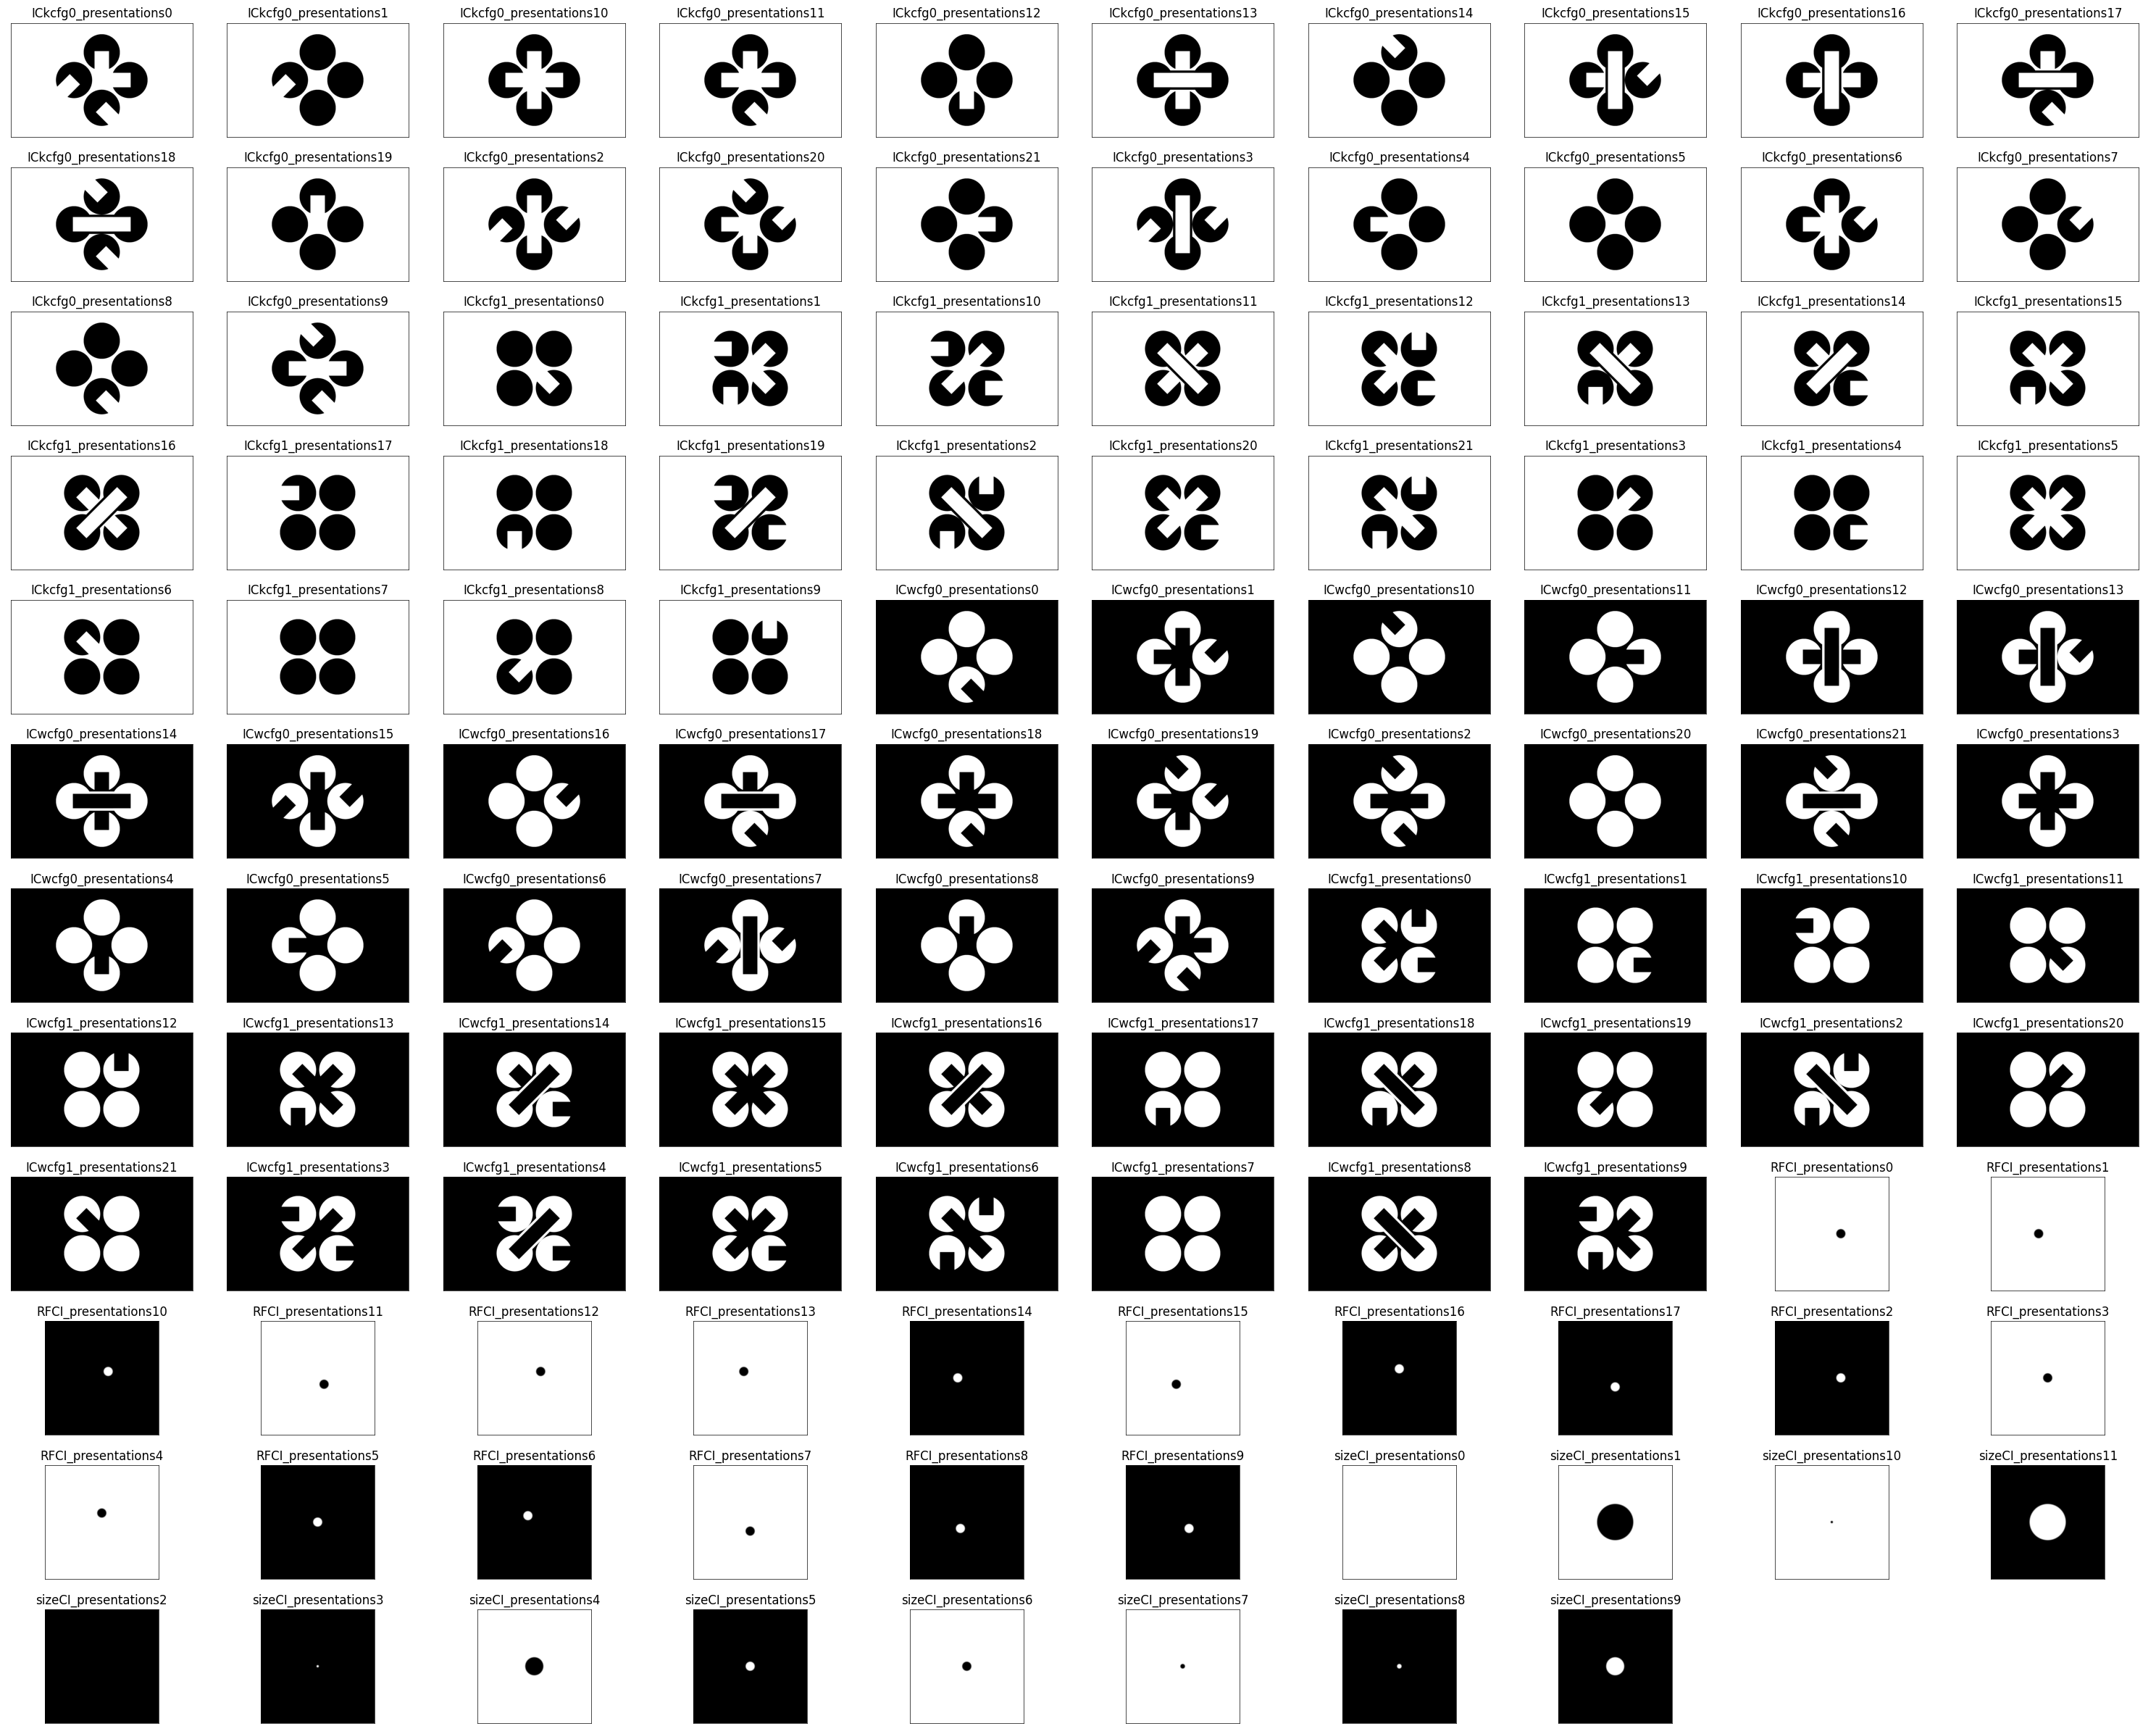

In [64]:
all_template_imgs = {}
for template_group in nwb.stimulus_template.keys():
    all_template_imgs |= nwb.stimulus_template[template_group].images

show_images(all_template_imgs)

### Extracting Stimulus Times


In [65]:
nwb.intervals.keys()

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'invalid_times', 'sizeCI_presentations', 'spontaneous_presentations'])

In [66]:
stim_table = nwb.intervals["ICkcfg0_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
0,5824.04856,5824.44889,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13484, 1, timestamps pynwb.base.TimeSeries a..."
1,5824.44889,5824.84923,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13485, 1, timestamps pynwb.base.TimeSeries a..."
2,5824.84923,5825.24957,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13486, 1, timestamps pynwb.base.TimeSeries a..."
3,5825.24957,5825.64991,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13487, 1, timestamps pynwb.base.TimeSeries a..."
4,5825.64991,5826.05025,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13488, 1, timestamps pynwb.base.TimeSeries a..."
5,5826.05025,5826.45058,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13489, 1, timestamps pynwb.base.TimeSeries a..."
6,5826.45058,5826.85092,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13490, 1, timestamps pynwb.base.TimeSeries a..."
7,5826.85092,5827.25125,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13491, 1, timestamps pynwb.base.TimeSeries a..."
8,5827.25125,5827.65159,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13492, 1, timestamps pynwb.base.TimeSeries a..."


In [67]:
print(np.mean(np.diff(stim_table.start_time)))
print(set(stim_table.frame))

0.40033645395213935
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0}


In [68]:
illusion_stim_select = lambda row: row.frame.item() == 10.0
illusion_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if illusion_stim_select(stim_table[i])]
print(len(illusion_stim_times))

control_stim_select = lambda row: row.frame.item() == 5.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(len(control_stim_times))

30
30


### Showing Probe Tracks

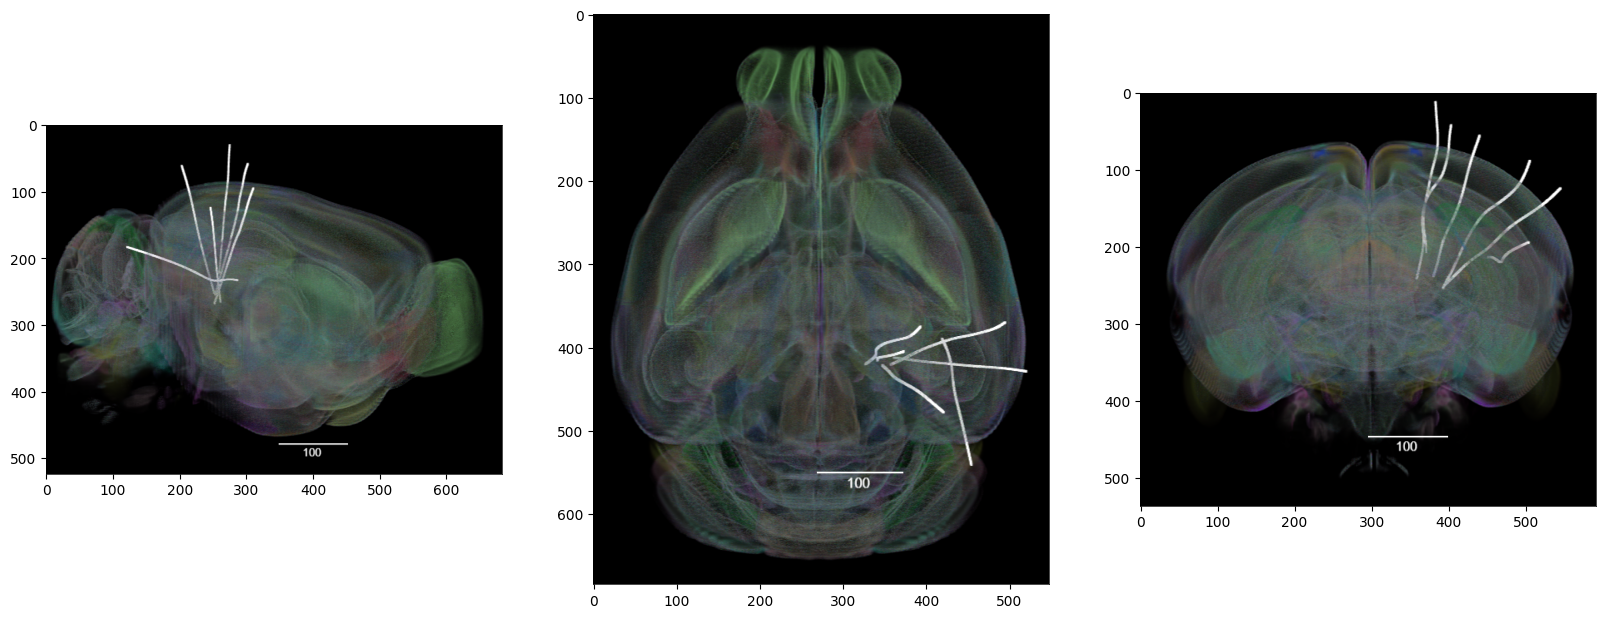

In [69]:
sagittal_view = Image.open("../../data/images/illusion_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/illusion_probes_dorsal.png")
transverse_view = Image.open("../../data/images/illusion_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)

### Extracting Units Spikes
Below, the `Units` table is retrived from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit.

In [70]:
units = nwb.units
units[:10]

,max_drift,spread,repolarization_slope,velocity_above,d_prime,nn_miss_rate,local_index,quality,waveform_halfwidth,snr,...,velocity_below,amplitude_cutoff,waveform_duration,PT_ratio,isolation_distance,amplitude,firing_rate,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,34.00,30.0,1.866277,0.000000,6.626220,0.000811,0,good,0.096147,4.860552,...,-1.000000,0.003285,0.178559,0.781018,78.114691,474.298695,3.197243,"[8.014794709919338, 8.293461076304402, 8.82879...","[0.00012949004762110477, 0.0001213092796695316...","[[0.0, 0.47657999999999645, 0.0772199999999962..."
19,40.17,60.0,1.107999,-0.412060,4.271249,0.009654,1,good,0.137353,2.764387,...,0.000000,0.500000,0.260972,0.532080,115.421707,246.130560,5.193174,"[50.997015060375595, 51.41301461210832, 51.757...","[0.00037993274566925847, 0.0003816832117861771...","[[0.0, 0.3112200000000027, -0.9989849999999991..."
20,24.25,110.0,1.209945,-0.057231,4.697081,0.001040,2,noise,0.178559,2.679727,...,-0.343384,0.500000,0.206030,0.445433,55.659774,268.688745,2.205221,"[4.837431467073574, 5.070397882703384, 5.38189...","[0.0002686896757199117, 0.00024659037033441513...","[[0.0, 0.8490299999999991, 0.6362850000000018,..."
21,11.10,70.0,1.542309,-0.274707,7.748337,0.000455,3,good,0.123618,4.091421,...,-0.343384,0.003494,0.192295,0.626257,102.377225,363.881895,3.091598,"[29.302205104647573, 29.363438371997976, 29.37...","[0.0004903548978179461, 0.0005185625567175445,...","[[0.0, -0.2427750000000014, -0.060255000000000..."
22,60.24,60.0,0.545493,-0.686767,3.683361,0.000417,4,good,0.178559,1.296938,...,-0.412060,0.014308,0.274707,0.339982,57.068266,238.263480,3.686589,"[4.8927647407816135, 4.986831306085279, 5.2071...","[0.0003544778954586829, 0.00028605818602693036...","[[0.0, 1.3367249999999982, 2.632305000000001, ..."
23,11.91,80.0,0.782181,-1.854271,5.929191,0.005763,5,good,0.109883,2.165281,...,0.206030,0.081811,0.192295,0.396397,144.017711,191.899305,40.079020,"[4.831464806836382, 4.8549647815135915, 4.8768...","[0.00016099845728550894, 0.0001640536935487669...","[[0.0, -0.2702700000000058, -0.877695000000002..."
24,34.87,30.0,0.895949,0.686767,4.833647,0.001395,6,good,0.109883,2.582031,...,0.000000,0.159102,0.192295,0.290704,71.934167,221.174850,8.153243,"[6.543396295449309, 6.747162742544032, 8.00679...","[0.00017716837002965157, 0.0002089591151967821...","[[0.0, -1.0297949999999982, -1.565069999999996..."
25,12.01,30.0,2.312019,0.000000,10.664306,0.000100,7,good,0.096147,5.079402,...,-1.000000,0.000069,0.192295,0.474435,191.051997,559.839540,0.424026,"[5.1960977472533925, 6.767129387695306, 7.3390...","[0.00037884489401791946, 0.0003530067131735268...","[[0.0, 0.14449500000000115, -0.829334999999998..."
26,21.36,70.0,0.950412,-0.412060,5.617911,0.002301,8,good,0.137353,2.380758,...,-0.274707,0.137771,0.288442,0.532951,129.795609,217.471995,24.930633,"[4.798231509314145, 4.812964826771346, 4.83006...","[0.0003202943462333242, 0.00031075076914757846...","[[0.0, 0.7388550000000004, 1.0032750000000001,..."


In [71]:
# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISp4', 'LP', 'PoT', 'VISrl2/3', 'VISp5', 'VISam2/3', 'SUB', 'VISam4', 'POL', 'MB', 'VISrl1', 'ENTm3', 'MGm', 'CA3', 'VISam6b', 'SCig', 'VISrl6a', 'ENTm2', 'DG-sg', 'APN', 'VISal6b', 'SGN', 'VISal5', 'VISrl4', 'PAR', 'CA1', 'ProS', 'DG-mo', 'VISal2/3', 'POST', 'ENTm6', 'VISpm2/3', 'MGd', 'VISpm4', 'VISrl5', 'VISp2/3', 'HPF', 'VISam6a', 'ENTm5', 'VISpm5', 'VISp6a', 'VISal6a', 'VISam5', 'VISpm6a', 'VISal4', 'PPT', 'DG-po', 'VISp6b', 'NOT'}


In [72]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

183


### Session Timeline

In [73]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [74]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

6
('ICwcfg1_presentations', 0.0, 99.23563, 4390.84373)
('ICwcfg0_presentations', 1.0, 4703.10623, 5255.57069)
('ICkcfg1_presentations', 2.0, 5263.57742, 5816.04183)
('ICkcfg0_presentations', 3.0, 5824.04856, 6376.51287)
('RFCI_presentations', 4.0, 6384.56968, 6564.77107)
('sizeCI_presentations', 5.0, 6594.86312, 7315.43515)


In [75]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

99 7316


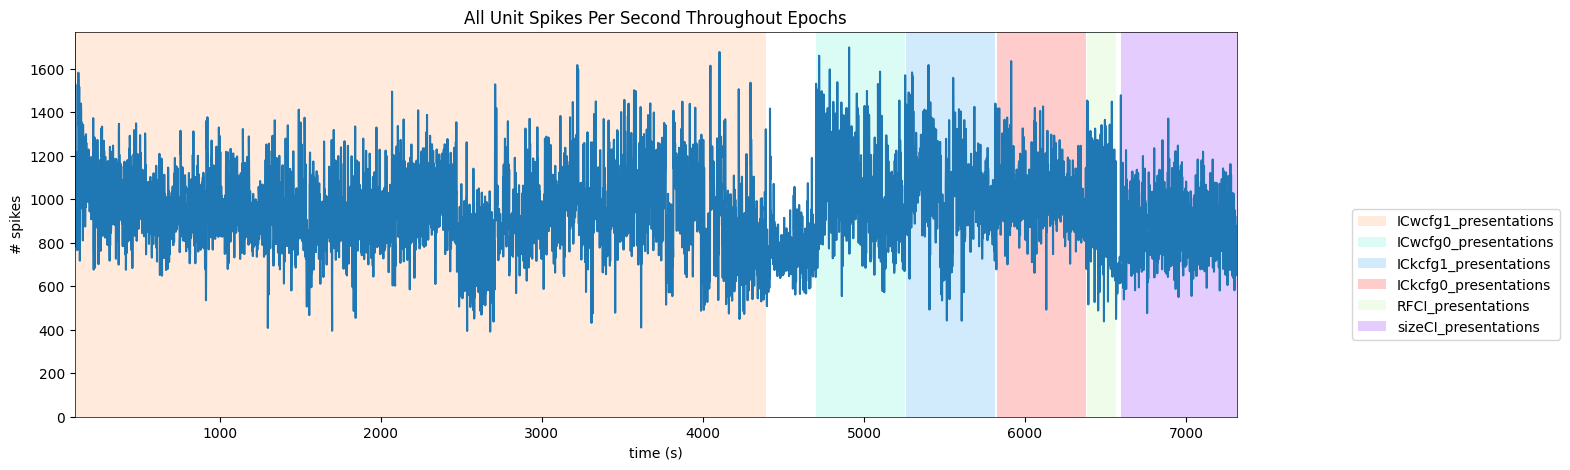

In [76]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec
    
ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.12, 0.25))
ax.plot(bins[:-1], hist)

### Generating Spike Matrix

In [77]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [78]:
def get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution):
    n_units = len(units_spike_times)
    n_trials = len(stim_times)

    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((n_units, n_trials, len(bin_edges)))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(n_units):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [79]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

illusion_spike_matrix = get_spike_matrix(units_spike_times, illusion_stim_times, bin_edges, time_resolution)
control_spike_matrix = get_spike_matrix(units_spike_times, control_stim_times, bin_edges, time_resolution)

print(illusion_spike_matrix.shape)
print(control_spike_matrix.shape)

(183, 30, 150)
(183, 30, 150)


### Showing Response Windows

In [80]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [81]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


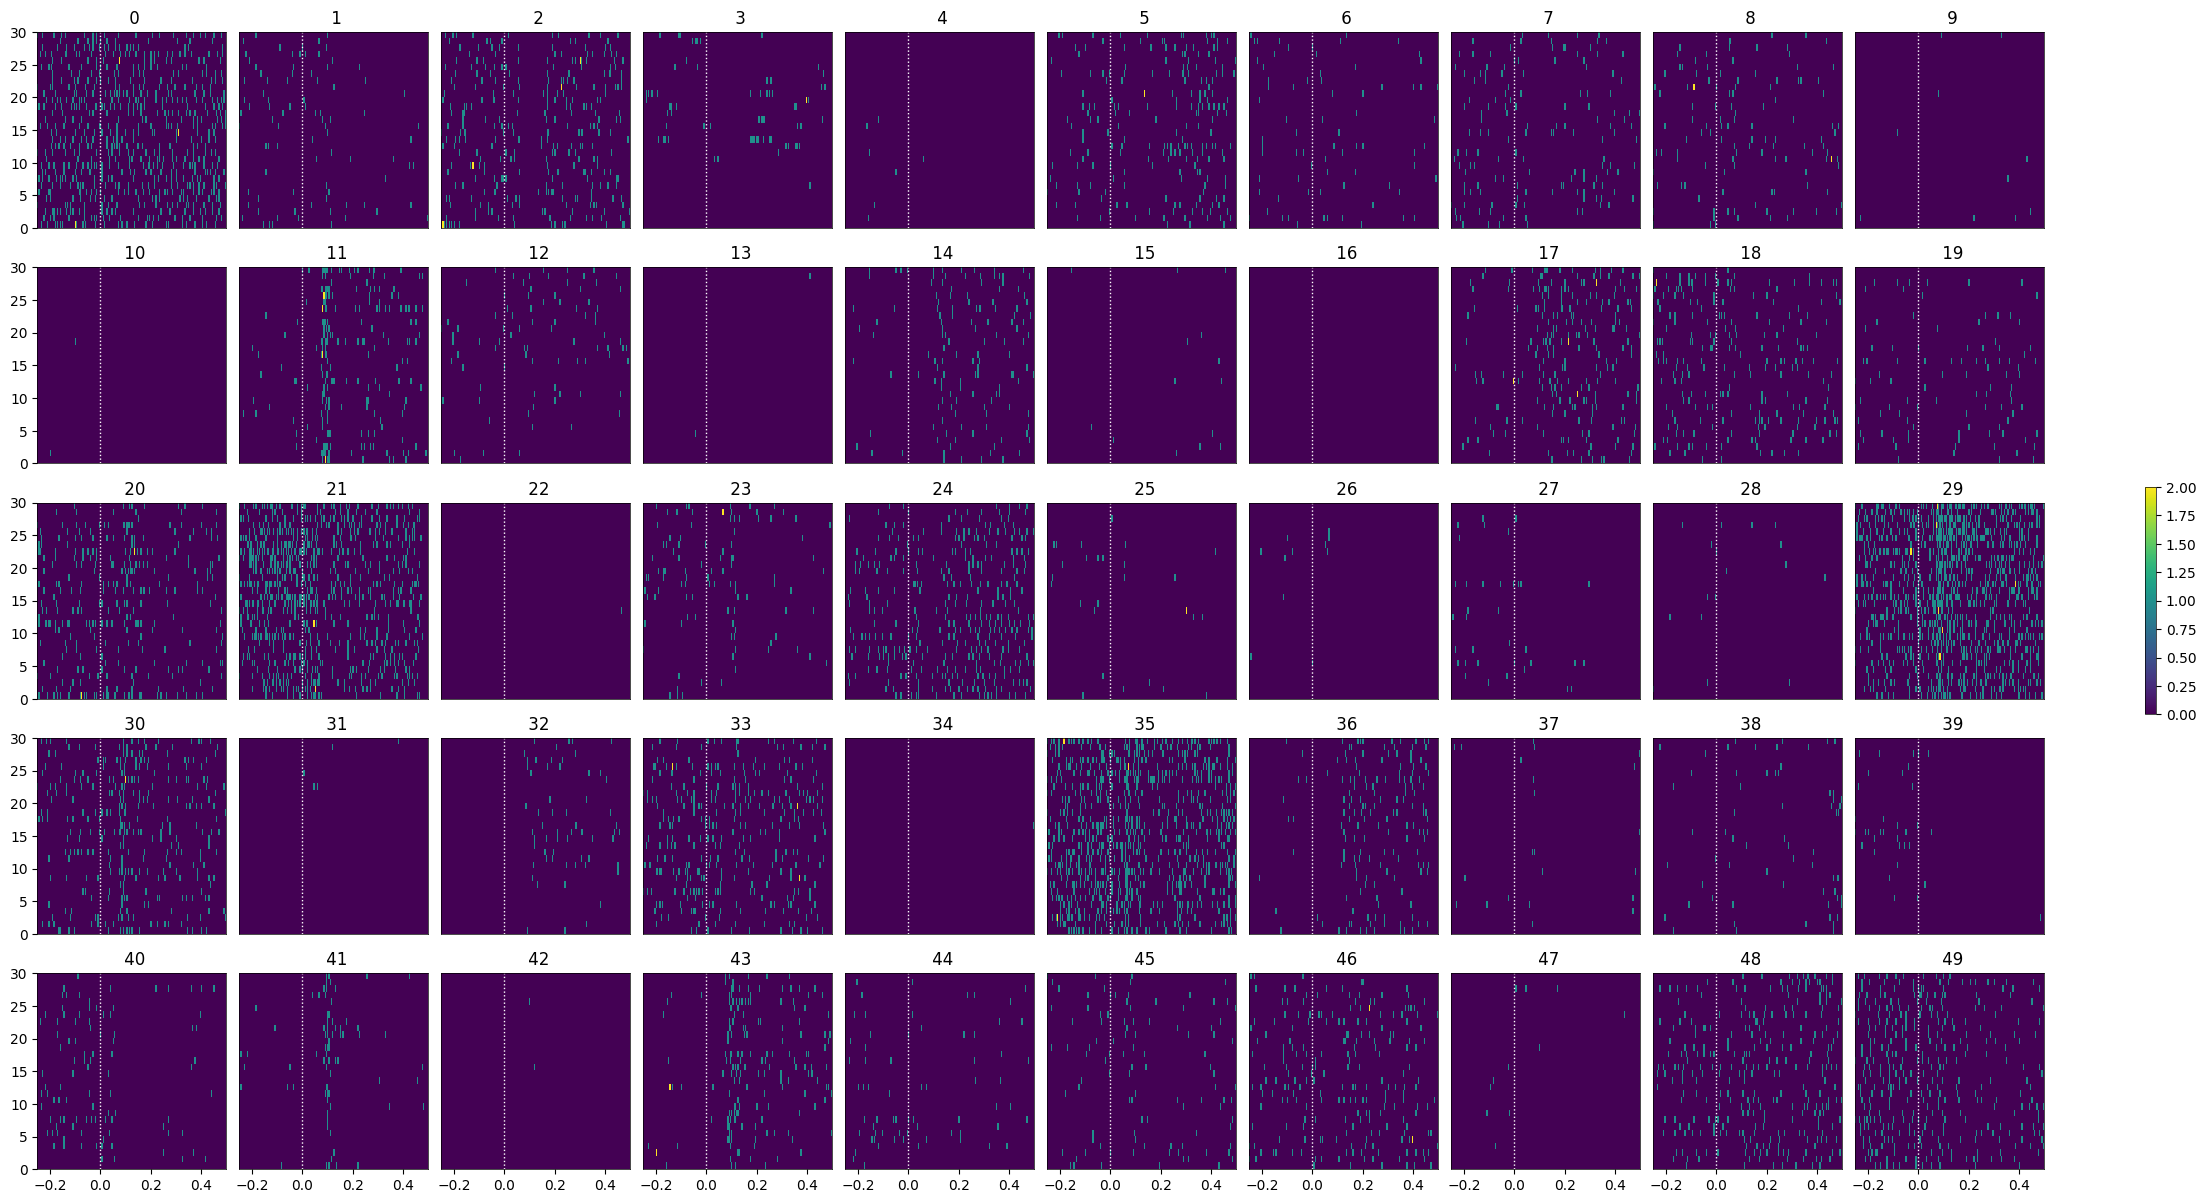

In [82]:
show_many_responses(illusion_spike_matrix, 5, 10)

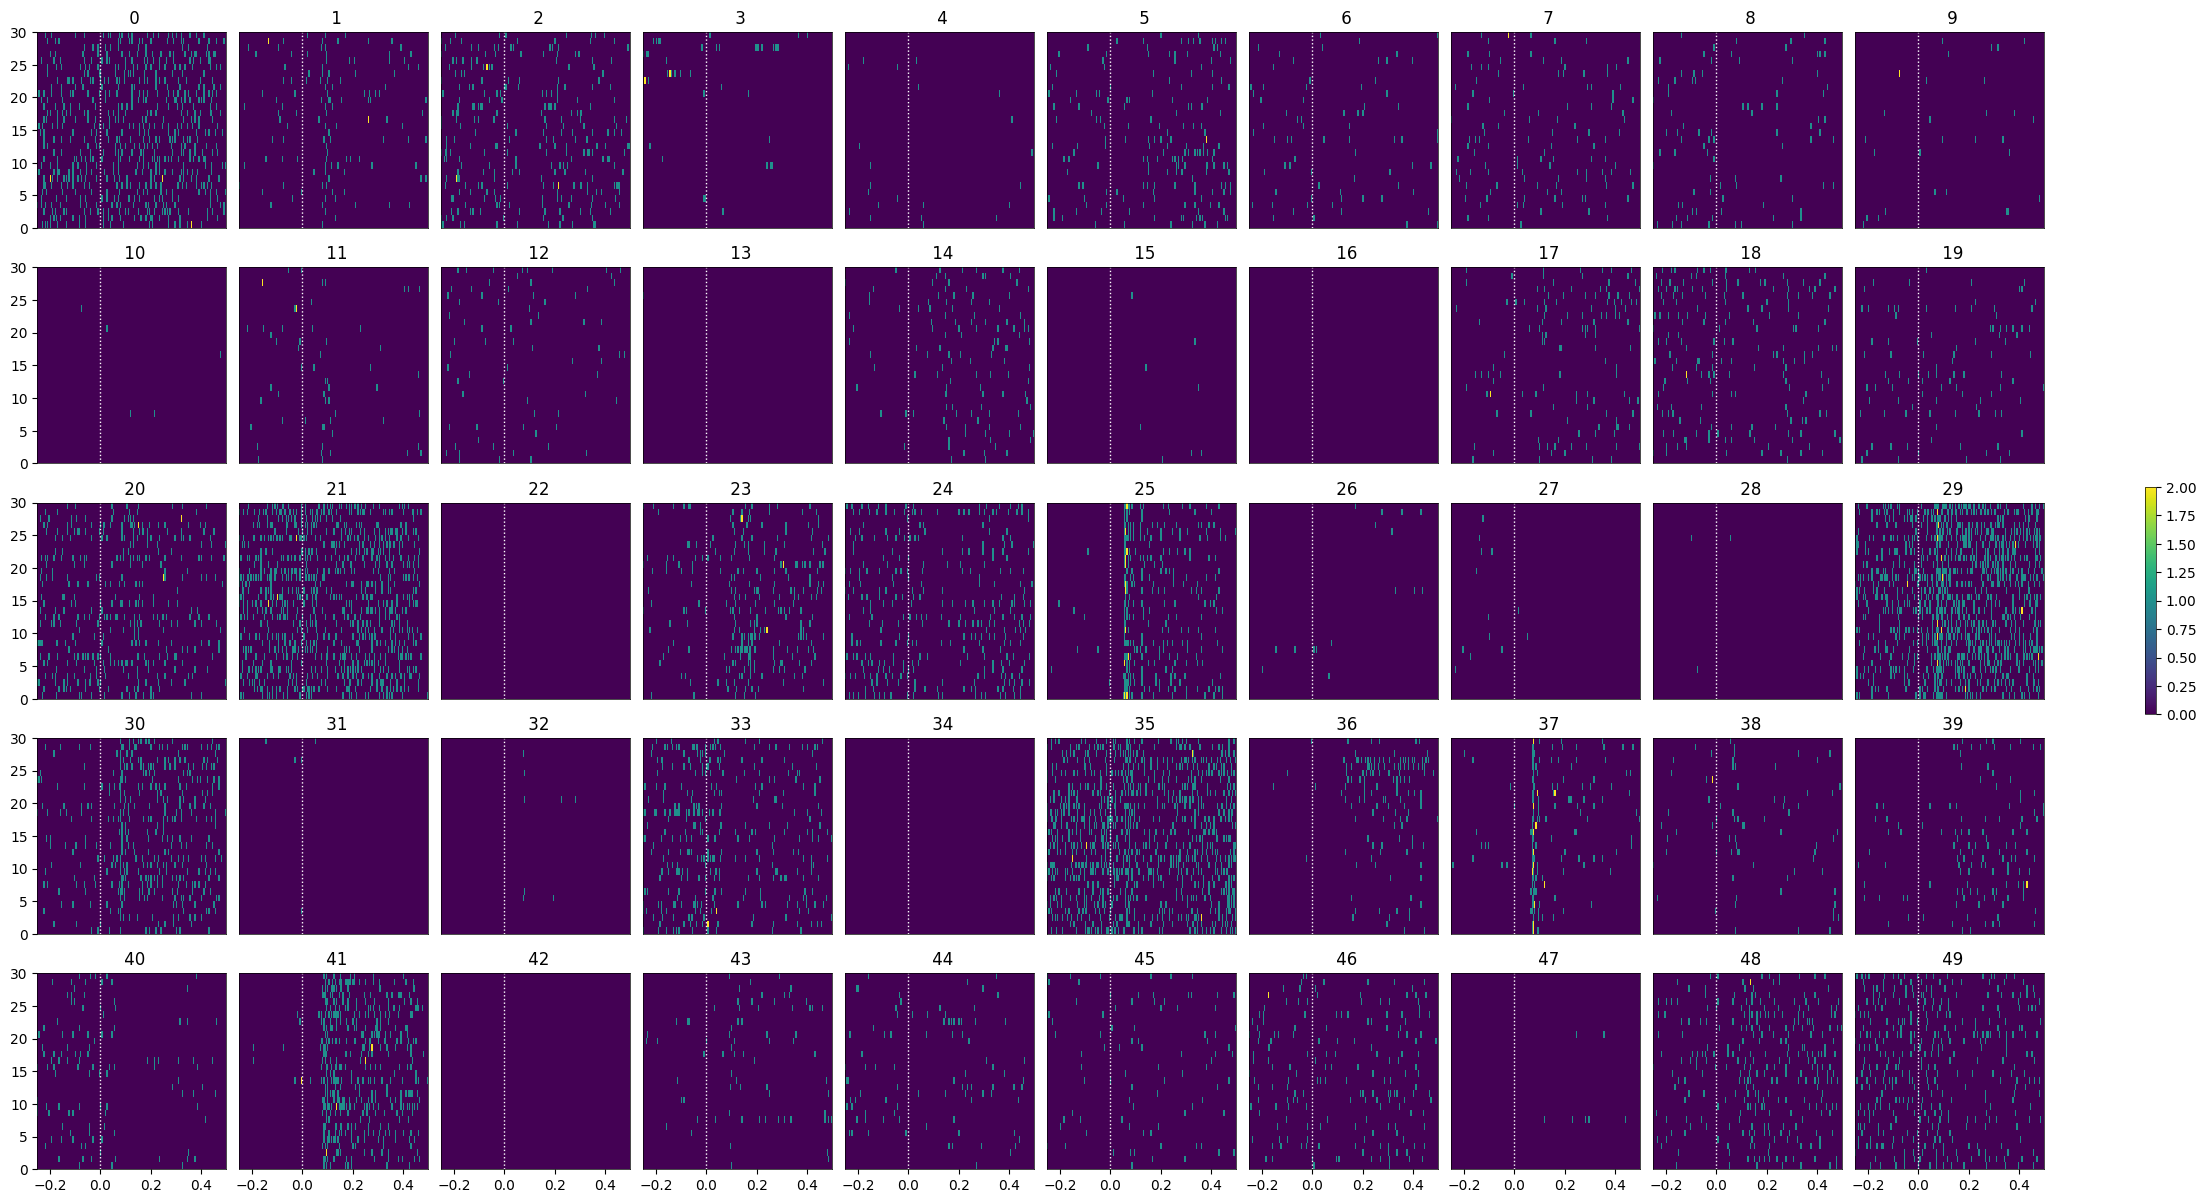

In [83]:
show_many_responses(control_spike_matrix, 5, 10)

### Selecting Responsive Cells

In [84]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 2, unit_z_scores < -2))[0]

divide by zero encountered in divide
invalid value encountered in divide


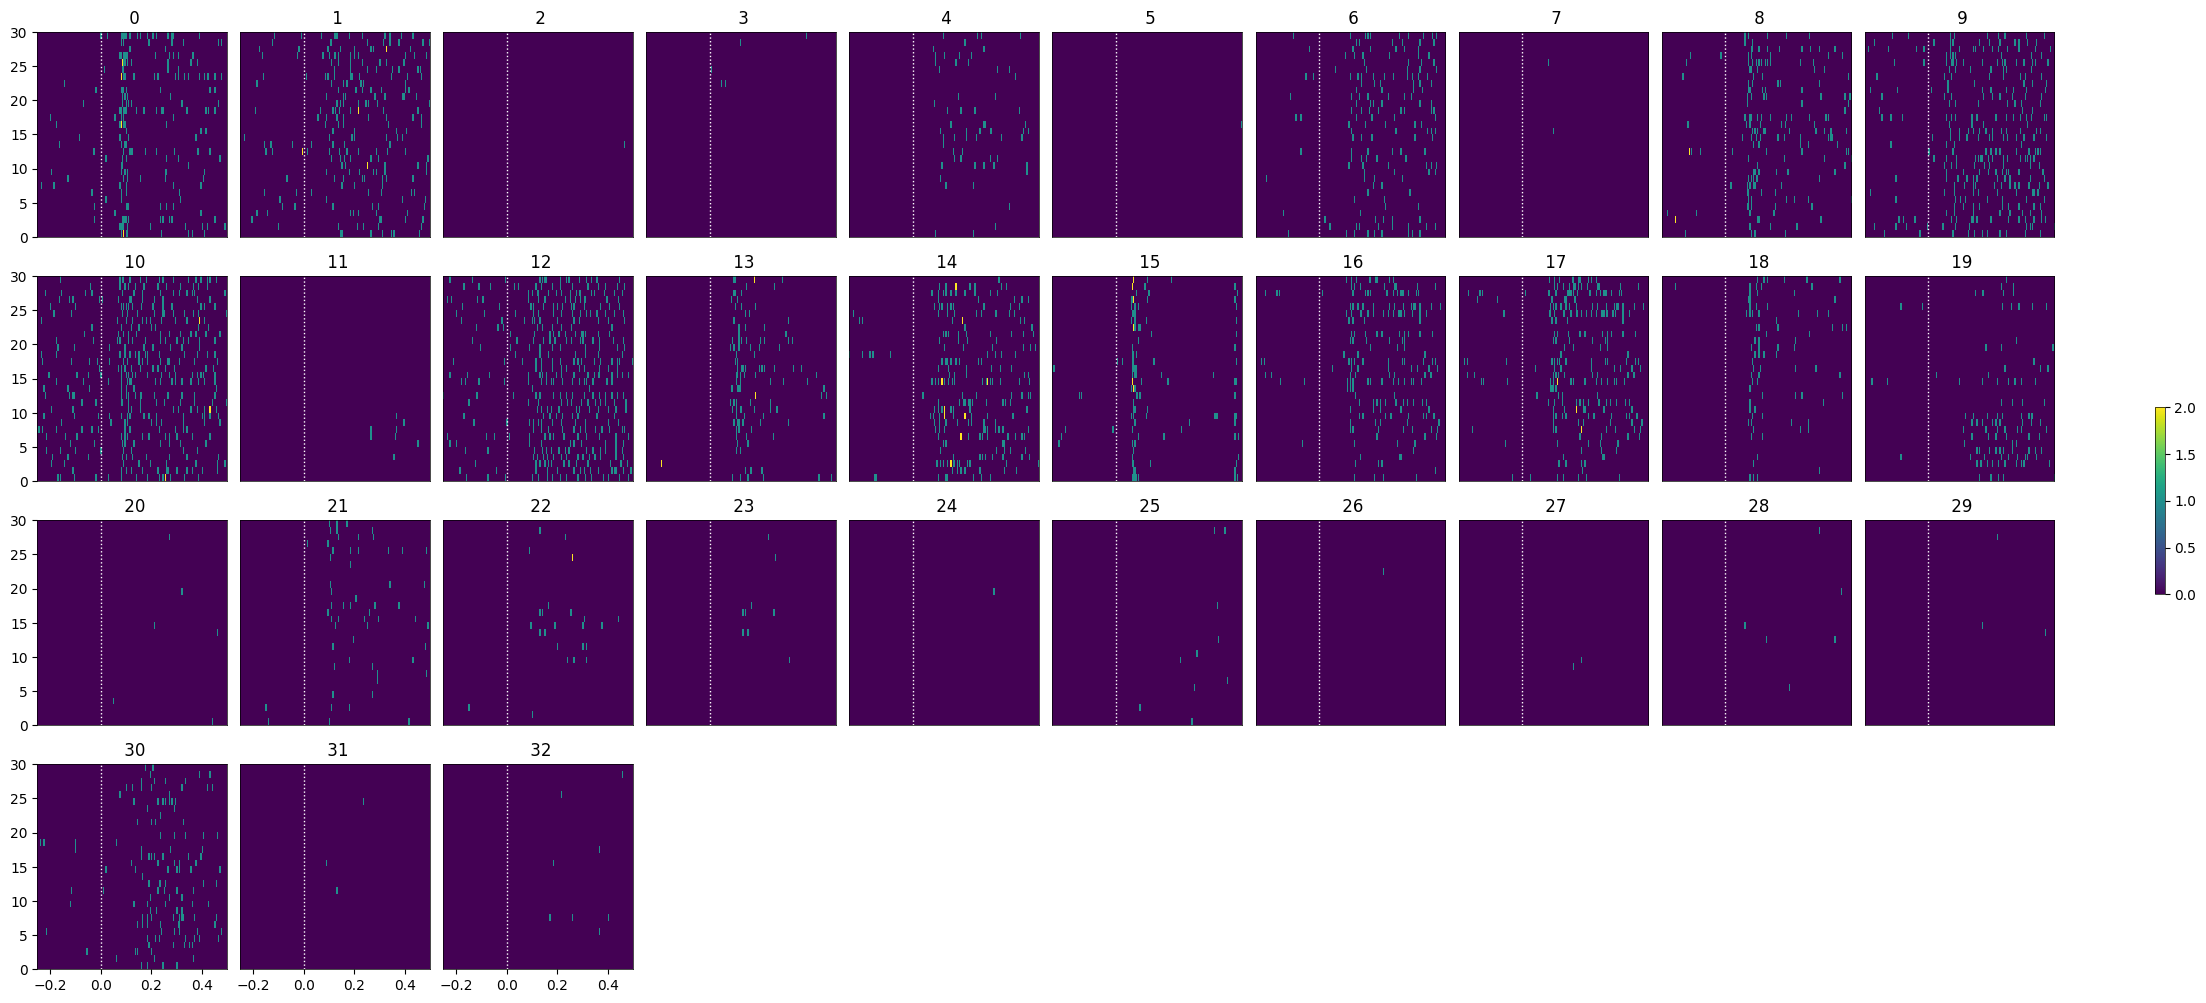

In [85]:
illusion_selected_idxs = select_cells(illusion_spike_matrix, stimulus_onset_idx)
show_many_responses(illusion_spike_matrix[illusion_selected_idxs], 5, 10)

divide by zero encountered in divide
invalid value encountered in divide


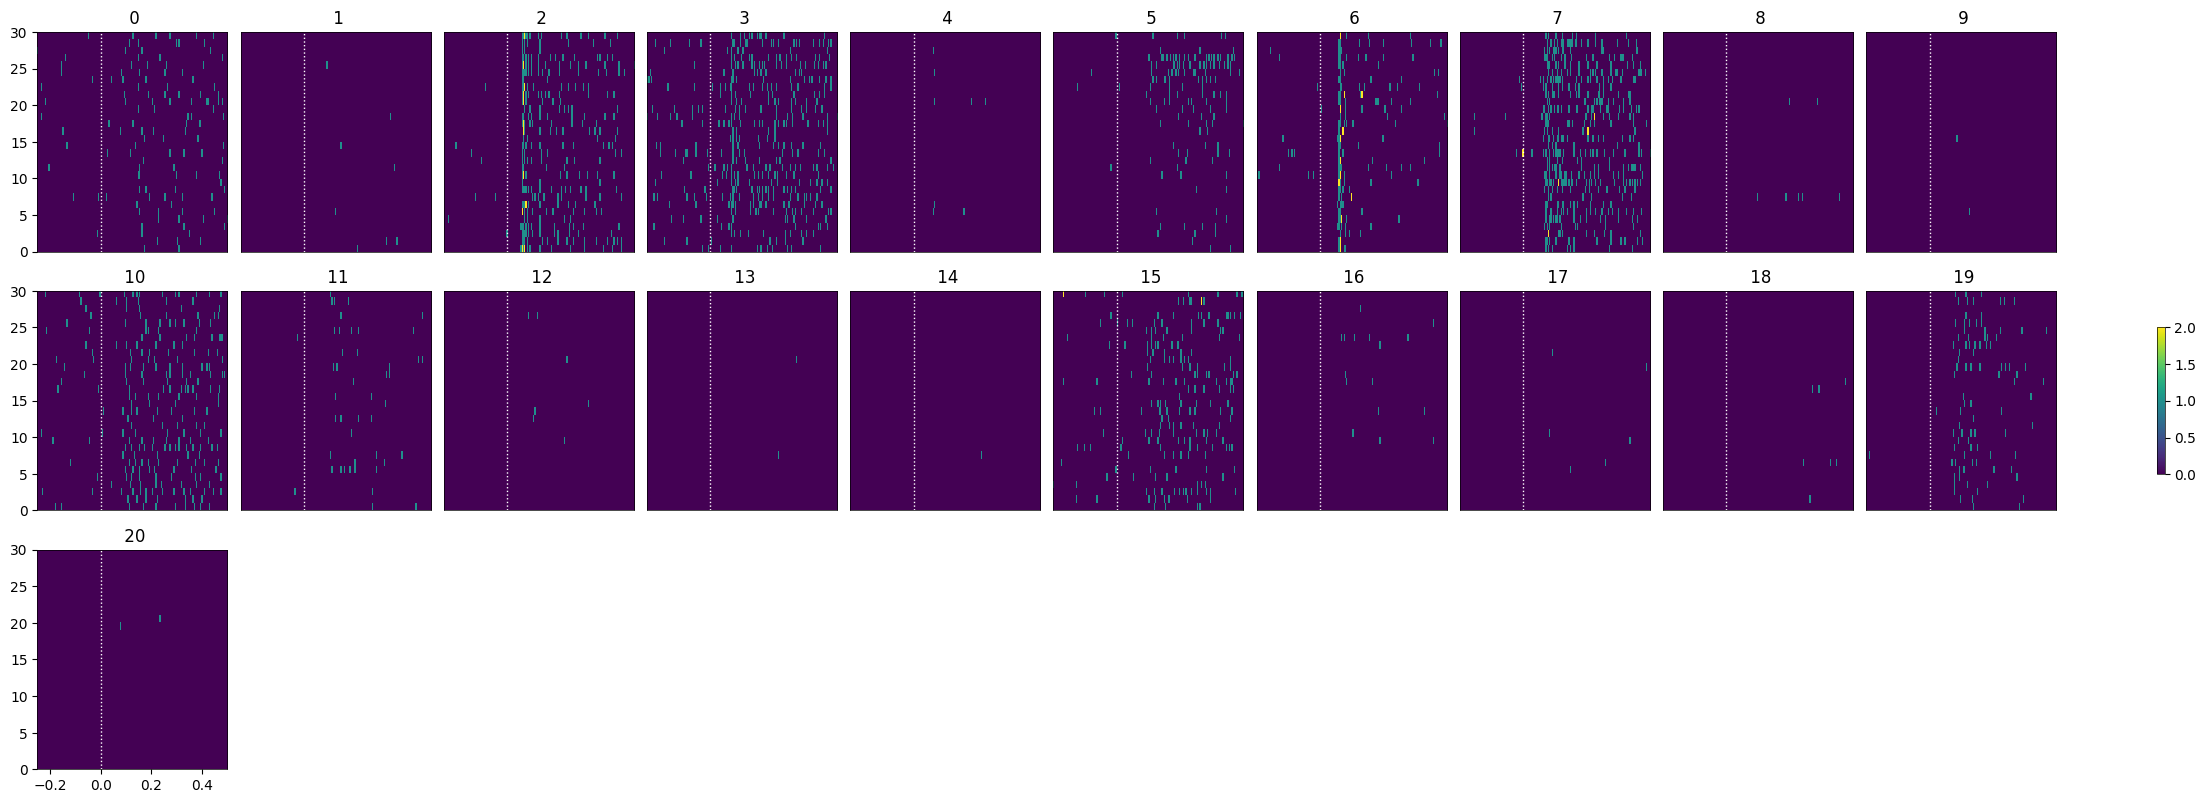

In [86]:
control_selected_idxs = select_cells(control_spike_matrix, stimulus_onset_idx)
show_many_responses(control_spike_matrix[control_selected_idxs], 5, 10)

### Getting Receptive Fields

In [87]:
rf_stim_table = nwb.intervals["RFCI_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,stimulus_index,temporal_frequency,Mask,orientation,x_position,y_position,color,contrast,opacity,phase,sf,size,units,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,6384.56968,6384.81986,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14865, 1, timestamps pynwb.base.TimeSeries a..."
1,6384.81986,6385.07007,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14866, 1, timestamps pynwb.base.TimeSeries a..."
2,6385.07007,6385.32029,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14867, 1, timestamps pynwb.base.TimeSeries a..."
3,6385.32029,6385.58720,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,0.000000,0.000000,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14868, 1, timestamps pynwb.base.TimeSeries a..."
4,6385.58720,6385.83738,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14869, 1, timestamps pynwb.base.TimeSeries a..."
5,6385.83738,6386.08760,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14870, 1, timestamps pynwb.base.TimeSeries a..."
6,6386.08760,6386.33781,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14871, 1, timestamps pynwb.base.TimeSeries a..."
7,6386.33781,6386.58802,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14872, 1, timestamps pynwb.base.TimeSeries a..."
8,6386.58802,6386.83824,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,143.810387,-143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14873, 1, timestamps pynwb.base.TimeSeries a..."


Text(0.5, 1.0, 'Location of receptive field gratings on Screen')

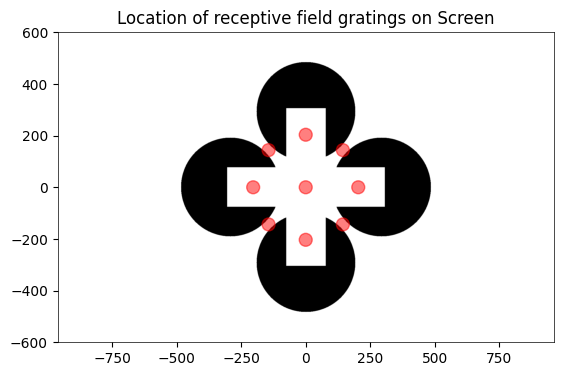

In [88]:
template = nwb.stimulus_template["ICkcfg0_presentations"].images["ICkcfg0_presentations10"]

fig, ax = plt.subplots()
img = ax.imshow(template, cmap="gray", extent=[-template.shape[1]/2., template.shape[1]/2., -template.shape[0]/2., template.shape[0]/2. ])

xcoords, ycoords = rf_stim_table.x_position, rf_stim_table.y_position
xy_pairs = set(zip(xcoords, ycoords))
for x,y in xy_pairs:
    ax.add_patch(mpl.patches.Circle((x, y), radius=25, color="red", alpha=0.5))

ax.set_title("Location of receptive field gratings on Screen")

In [89]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
pix


In [90]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [91]:
### compute receptive fields for each unit in selected units

illusion_rfs = []
for idx in illusion_selected_idxs:
    these_spike_times = units_spike_times[idx]
    illusion_rfs.append(get_rf(these_spike_times))

control_rfs = []
for idx in control_selected_idxs:
    these_spike_times = units_spike_times[idx]
    control_rfs.append(get_rf(these_spike_times))

In [92]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs, n_cols=10):
    n_rows = len(rfs) // n_cols
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= n_cols rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]


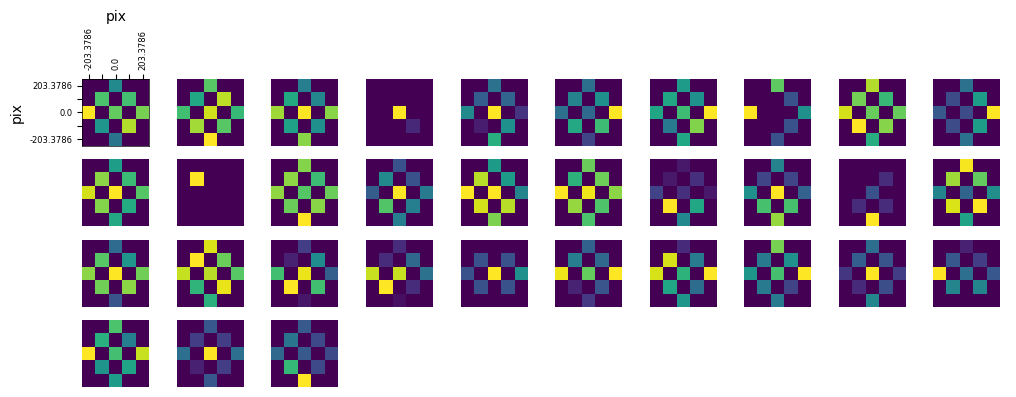

In [93]:
display_rfs(illusion_rfs)

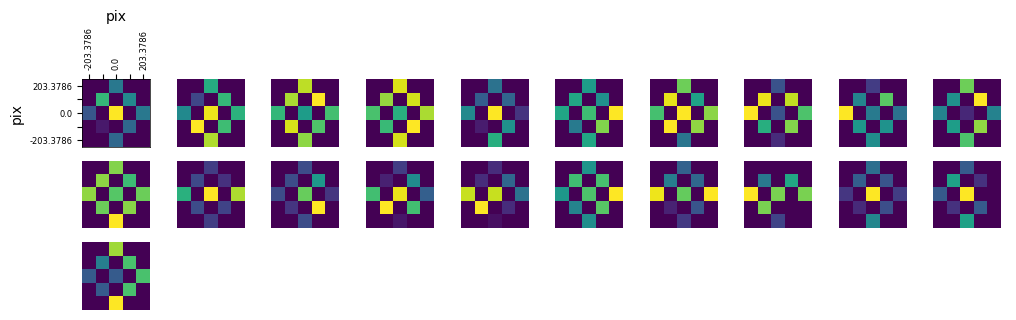

In [94]:
display_rfs(control_rfs)

### Optotagging

In [95]:
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_stim_table[:20]

,start_time,condition,level,stop_time,stimulus_name,duration,tags,timeseries
id,,,,,,,,
0,7351.42759,half-period of a cosine wave,1.4,7351.44009,raised_cosine,0.0125,[optical_stimulation],"[(0, 1, optotagging pynwb.ogen.OptogeneticSeri..."
1,7354.21649,1 second of 100 Hz pulse train.Each pulse is 2...,1.4,7354.22649,100 hz pulse train,0.0100,[optical_stimulation],"[(1, 1, optotagging pynwb.ogen.OptogeneticSeri..."
2,7356.83859,half-period of a cosine wave,1.4,7356.85109,raised_cosine,0.0125,[optical_stimulation],"[(2, 1, optotagging pynwb.ogen.OptogeneticSeri..."
3,7359.21890,Each pulse is 6 ms wide,1.4,7359.25190,40 hz pulse train,0.0330,[optical_stimulation],"[(3, 1, optotagging pynwb.ogen.OptogeneticSeri..."
4,7361.74981,1 second of 40 Hz pulse train.Each pulse is 2 ...,1.4,7361.77481,fast_pulses,0.0250,[optical_stimulation],"[(4, 1, optotagging pynwb.ogen.OptogeneticSeri..."
5,7364.11442,1 second square pulse: continuously on for 1s,1.4,7365.11442,Square Pulse,1.0000,[optical_stimulation],"[(5, 1, optotagging pynwb.ogen.OptogeneticSeri..."
6,7366.60513,2 ms pulses at 1 Hz,1.4,7367.60513,fast_pulses,1.0000,[optical_stimulation],"[(6, 1, optotagging pynwb.ogen.OptogeneticSeri..."
7,7369.21490,a single 10ms pulse,1.4,7370.21490,pulse,1.0000,[optical_stimulation],"[(7, 1, optotagging pynwb.ogen.OptogeneticSeri..."
8,7372.22582,1 second of 5Hz pulse train.Each pulse is 2 ms...,1.4,7372.42582,pulse,0.2000,[optical_stimulation],"[(8, 1, optotagging pynwb.ogen.OptogeneticSeri..."


In [107]:
opto_stim_times = [float(row.start_time) for row in opto_stim_table if isclose(float(row.duration), 1.0)]

In [111]:
len(units_spike_times)

183

In [108]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [109]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

opto_spike_matrix = get_spike_matrix(units_spike_times, opto_stim_times, bin_edges, time_resolution)

print(opto_spike_matrix.shape)

(183, 150, 150)


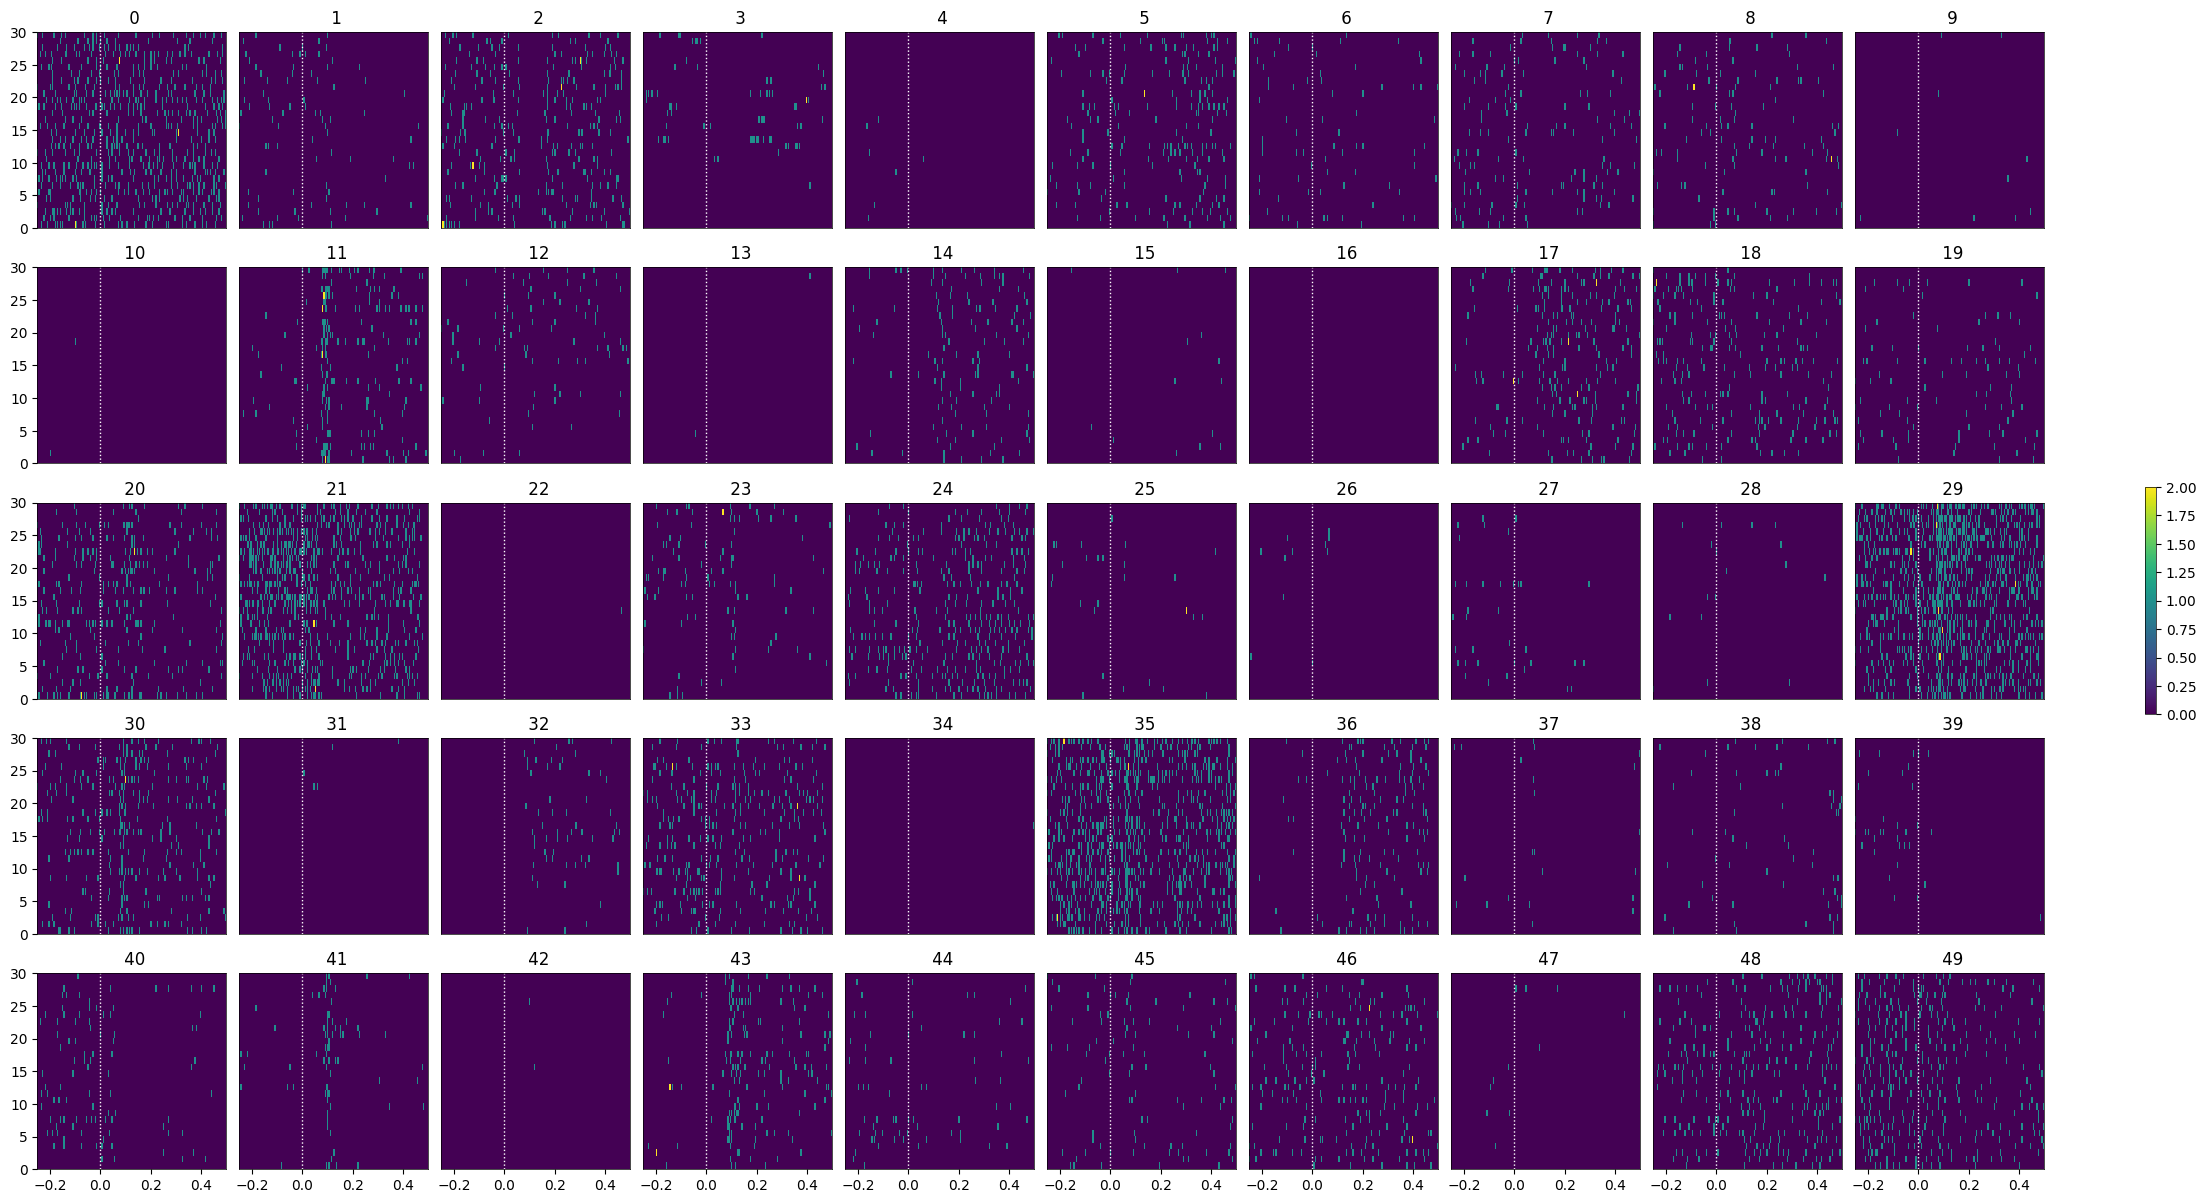

In [112]:
show_many_responses(illusion_spike_matrix, 5, 10)

divide by zero encountered in divide
invalid value encountered in divide


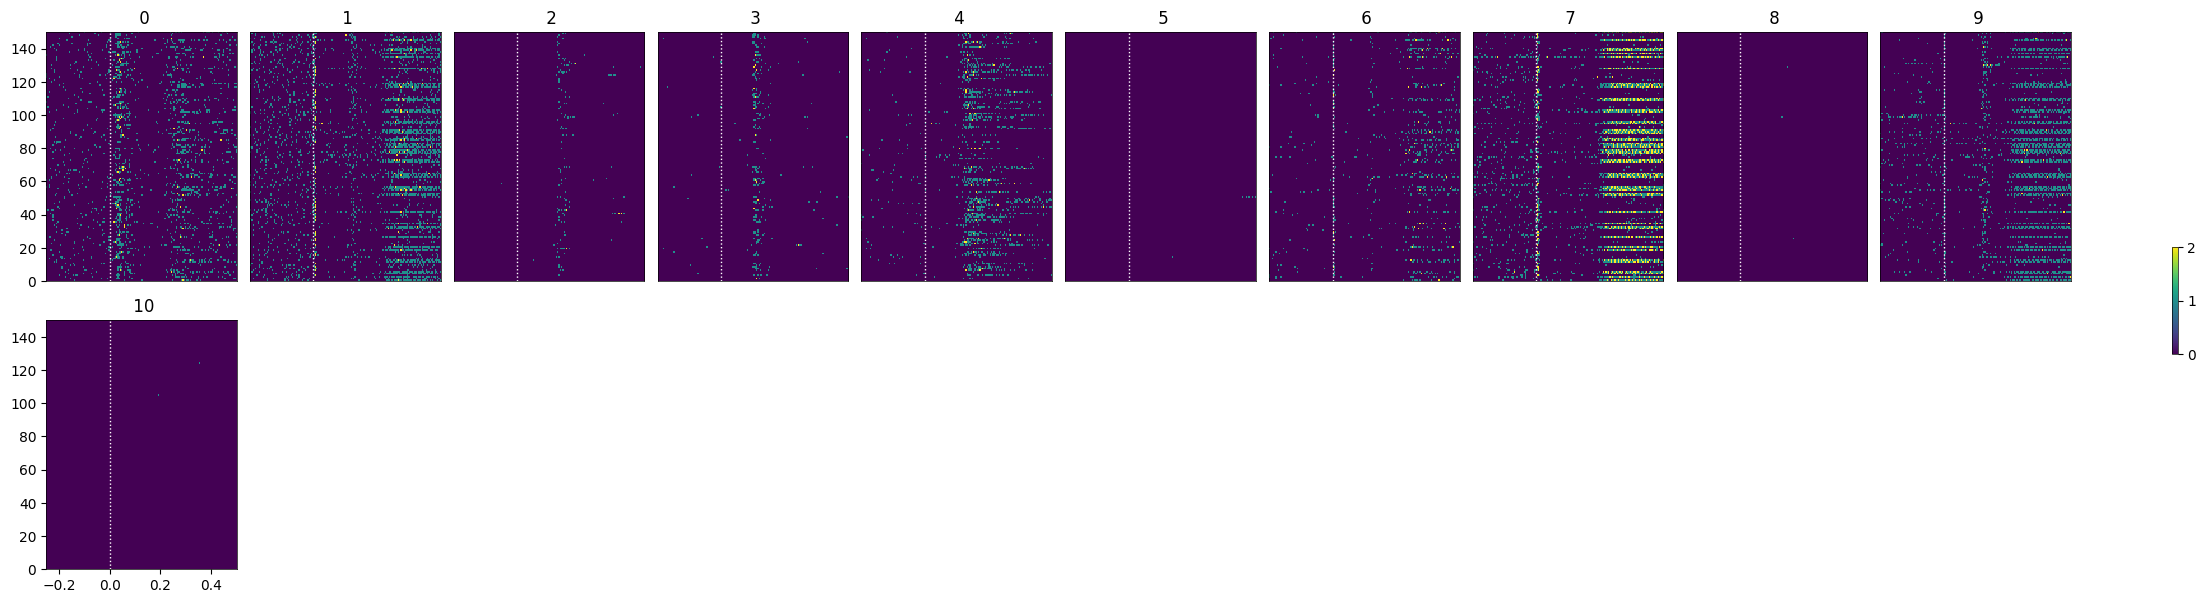

In [113]:
opto_selected_idxs = select_cells(opto_spike_matrix, stimulus_onset_idx)
show_many_responses(opto_spike_matrix[opto_selected_idxs], 5, 10)

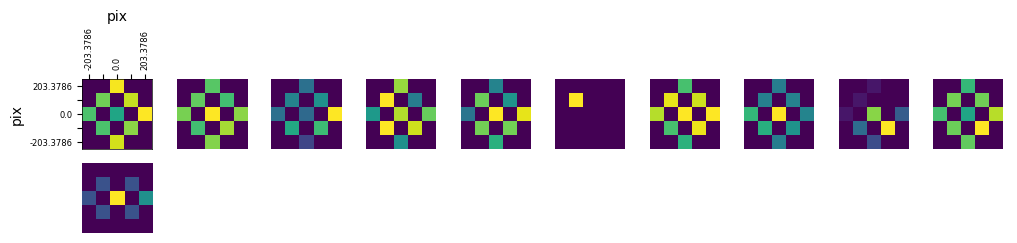

In [114]:
opto_rfs = []
for idx in opto_selected_idxs:
    these_spike_times = units_spike_times[idx]
    opto_rfs.append(get_rf(these_spike_times))

display_rfs(opto_rfs)